In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import psycopg
import pandas as pd
from scipy.stats import cumfreq

**NOTE**  
Set the credentials in the cell below before executing the notebook any further.

In [ ]:
CONFIG_MULTISOLVENT = None

def SetLoginInfoAndConfigMultisolvent():
    global CONFIG_MULTISOLVENT
    CONFIG_MULTISOLVENT = {}
    CONFIG_MULTISOLVENT['dbtype'] ='postgresql'
    CONFIG_MULTISOLVENT['host'] = 'ADD HOSTNAME'
    CONFIG_MULTISOLVENT['username'] = 'ADD USERNAME'
    CONFIG_MULTISOLVENT['dbname'] = 'ADD DBNAME'

SetLoginInfoAndConfigMultisolvent()

In [ ]:
cn = psycopg.connect(dbname=CONFIG_MULTISOLVENT['dbname'], user=CONFIG_MULTISOLVENT['username'], host=CONFIG_MULTISOLVENT['host'])
curs = cn.cursor()
sql = "select entrynr from extractions.et4hierarchy where ignored is not true and hierarchyclass!='GG' order by entrynr;"
curs.execute(sql)
entrynrs = curs.fetchall()
entrynrs = [i[0] for i in entrynrs]

In [ ]:
def GetTauDataFrameForComparisonGroup(comparisonid):
    sql = "select entrynr, wasserstein2norm, omeganorm, tau from comparisons.metrics where comparisonid=%s"
    curs.execute(sql,(comparisonid,))
    metrics = curs.fetchall()
    metricsDf = pd.DataFrame(metrics, columns=['entrynr', 'wasserstein2norm', 'omeganorm', 'tau'])
    return metricsDf

def GetCdf(data, metric, numBins):
    x = data[metric]
    r = cumfreq(x, numbins=numBins)
    x = r.lowerlimit + np.linspace(0, r.binsize * r.cumcount.size, r.cumcount.size)
    c = r.cumcount / r.cumcount[-1]
    return x, c

In [5]:
crystalVac = GetTauDataFrameForComparisonGroup(1)
crystalWater = GetTauDataFrameForComparisonGroup(2)
vacWater = GetTauDataFrameForComparisonGroup(3)
crystalHexane = GetTauDataFrameForComparisonGroup(4)
vacHexane = GetTauDataFrameForComparisonGroup(5)
waterHexane = GetTauDataFrameForComparisonGroup(6)

In [6]:
# tau
x1tau, c1tau = GetCdf(crystalVac, 'tau', 100)
x2tau, c2tau = GetCdf(crystalWater, 'tau', 100)
x3tau, c3tau = GetCdf(vacWater, 'tau', 100)
x4tau, c4tau = GetCdf(crystalHexane, 'tau', 100)
x5tau, c5tau = GetCdf(vacHexane, 'tau', 100)
x6tau, c6tau = GetCdf(waterHexane, 'tau', 100)
# w2
x1w2, c1w2 = GetCdf(crystalVac, 'wasserstein2norm', 100)
x2w2, c2w2 = GetCdf(crystalWater, 'wasserstein2norm', 100)
x3w2, c3w2 = GetCdf(vacWater, 'wasserstein2norm', 100)
x4w2, c4w2 = GetCdf(crystalHexane, 'wasserstein2norm', 100)
x5w2, c5w2 = GetCdf(vacHexane, 'wasserstein2norm', 100)
x6w2, c6w2 = GetCdf(waterHexane, 'wasserstein2norm', 100)
# omega
x1omega, c1omega = GetCdf(crystalVac, 'omeganorm', 100)
x2omega, c2omega = GetCdf(crystalWater, 'omeganorm', 100)
x3omega, c3omega = GetCdf(vacWater, 'omeganorm', 100)
x4omega, c4omega = GetCdf(crystalHexane, 'omeganorm', 100)
x5omega, c5omega = GetCdf(vacHexane, 'omeganorm', 100)
x6omega, c6omega = GetCdf(waterHexane, 'omeganorm', 100)

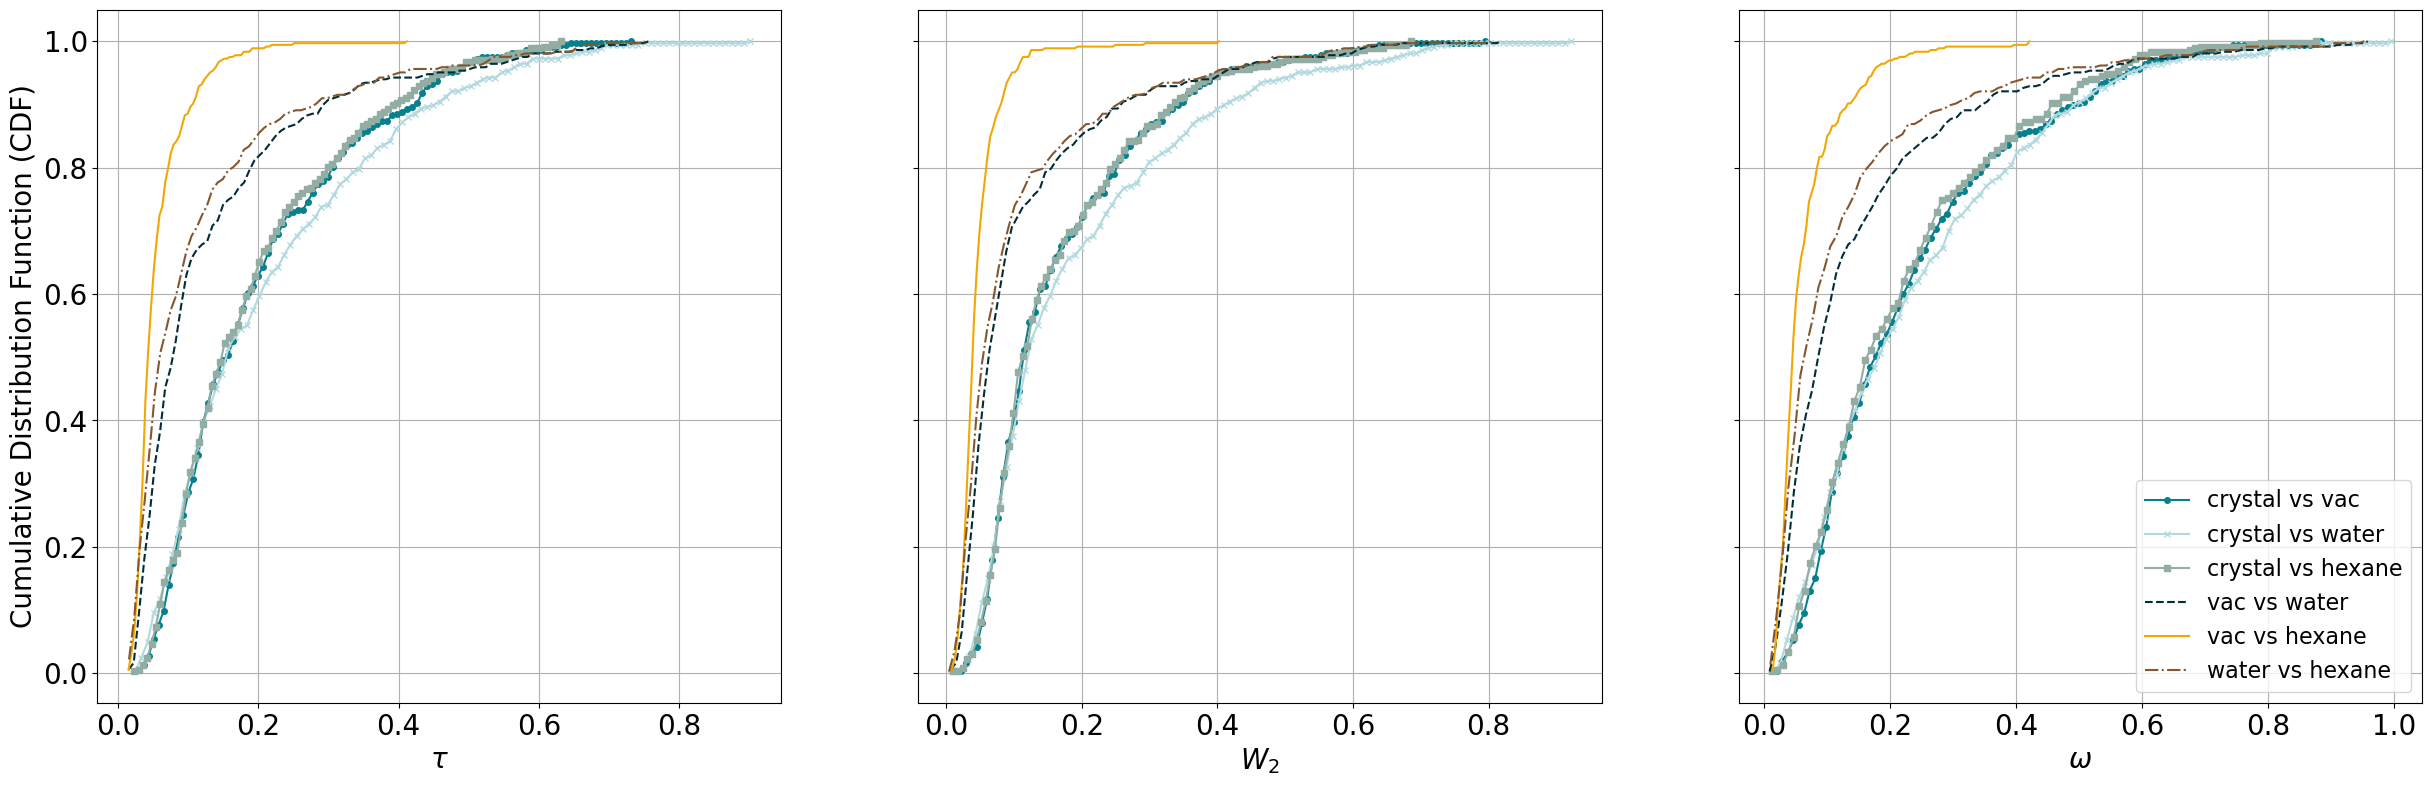

In [7]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1,3,figsize=(30, 9),sharey=True)
colors = ['#05808c',
          '#b3d9e0',
          '#92ada4',
          '#002d37',
          '#f1a805',
          '#84572f'
]
ax[0].plot(x1tau, c1tau, label='crystal vs vac', marker='o', markersize=4, c=colors[0])
ax[0].plot(x2tau, c2tau, label='crystal vs water', marker='x', markersize=4, c=colors[1])
ax[0].plot(x4tau, c4tau, label='crystal vs hexane', marker='s', markersize=4, c=colors[2])
ax[0].plot(x3tau, c3tau, label='vac vs water', linestyle='--', c=colors[3])
ax[0].plot(x5tau, c5tau, label='vac vs hexane', c=colors[4])
ax[0].plot(x6tau, c6tau, label='water vs hexane', linestyle='dashdot', c=colors[5])
ax[0].set_xlabel(r"$\tau$")
ax[0].grid()
ax[0].set_ylabel('Cumulative Distribution Function (CDF)')    
ax[1].plot(x1w2, c1w2, label='crystal vs vac', marker='o', markersize=4, c=colors[0])
ax[1].plot(x2w2, c2w2, label='crystal vs water', marker='x', markersize=4, c=colors[1])
ax[1].plot(x4w2, c4w2, label='crystal vs hexane', marker='s', markersize=4, c=colors[2])
ax[1].plot(x3w2, c3w2, label='vac vs water', linestyle='--', c=colors[3])
ax[1].plot(x5w2, c5w2, label='vac vs hexane', c=colors[4])
ax[1].plot(x6w2, c6w2, label='water vs hexane', linestyle='dashdot', c=colors[5])
ax[1].set_xlabel(r"$W_2$")
ax[1].grid()
ax[2].plot(x1omega, c1omega, label='crystal vs vac', marker='o', markersize=4, c=colors[0])
ax[2].plot(x2omega, c2omega, label='crystal vs water', marker='x', markersize=4, c=colors[1])
ax[2].plot(x4omega, c4omega, label='crystal vs hexane', marker='s', markersize=4, c=colors[2])
ax[2].plot(x3omega, c3omega, label='vac vs water', linestyle='--', c=colors[3])
ax[2].plot(x5omega, c5omega, label='vac vs hexane', c=colors[4])
ax[2].plot(x6omega, c6omega, label='water vs hexane', linestyle='dashdot', c=colors[5])
ax[2].set_xlabel(r"$\omega$")
ax[2].grid()
ax[2].legend(loc='lower right', fontsize=16)